In [8]:
import pandas as pd

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import warnings
warnings.filterwarnings('ignore')

## Adding data (employee.csv file uploading)

In [11]:
df = pd.read_csv('Employee.csv')

In [12]:
df.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [13]:
df.tail()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1672,1672,30,Travel_Rarely,945,Sales,1,3,Life Sciences,1,4,...,80,0,10,2,4,10,0,0,8,0
1673,1673,32,Travel_Rarely,1303,Research & Development,2,3,Life Sciences,1,1,...,80,1,10,3,4,4,2,1,3,0
1674,1674,29,Travel_Frequently,1184,Human Resources,24,3,Human Resources,1,2,...,80,0,1,2,3,1,0,0,0,1
1675,1675,36,Travel_Rarely,441,Sales,9,2,Marketing,1,2,...,80,2,10,3,2,10,3,0,8,0
1676,1676,36,Travel_Rarely,1141,Research & Development,20,3,Life Sciences,1,3,...,80,0,10,3,2,8,2,7,3,0


In [14]:
df.shape

(1677, 35)

In [15]:
df.columns

Index(['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [16]:
df.duplicated().sum()

0

In [17]:
df.isnull().sum()

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [19]:
df.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,...,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,36.036971,892.749553,8.683959,2.937984,1.0,2.757901,67.798450,2.782349,1.998807,...,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,484.252517,8.507112,374.496259,7.826143,1.039078,0.0,1.086835,19.435928,0.650664,1.083065,...,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,0.000000,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,51.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,838.000000,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,69.000000,3.000000,2.000000,...,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1257.000000,41.000000,1223.000000,12.000000,4.000000,1.0,4.000000,84.000000,3.000000,2.000000,...,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1676.000000,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,...,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


In [20]:
df.nunique()

id                          1677
Age                           43
BusinessTravel                 3
DailyRate                    625
Department                     3
DistanceFromHome              29
Education                      6
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       6
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome                895
MonthlyRate                  903
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             41
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

In [21]:
df_new = df[['BusinessTravel', 'Department', 'Education', 'EducationField',
            'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
            'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime',
             'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
             'TrainingTimesLastYear', 'WorkLifeBalance', 'Attrition']]

## Creating report from raw data analyzed before

In [22]:
for i in df_new.columns:
    print(i,':')
    print('Unique Values:', df_new[i].unique())
    print('Value Counts:')
    print(df_new[i].value_counts())
    print('\n')

BusinessTravel :
Unique Values: ['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
Value Counts:
Travel_Rarely        1290
Travel_Frequently     261
Non-Travel            126
Name: BusinessTravel, dtype: int64


Department :
Unique Values: ['Research & Development' 'Sales' 'Human Resources']
Value Counts:
Research & Development    1167
Sales                      471
Human Resources             39
Name: Department, dtype: int64


Education :
Unique Values: [ 3  4  1  2  5 15]
Value Counts:
3     682
4     464
2     304
1     182
5      44
15      1
Name: Education, dtype: int64


EducationField :
Unique Values: ['Medical' 'Other' 'Marketing' 'Life Sciences' 'Technical Degree'
 'Human Resources']
Value Counts:
Life Sciences       775
Medical             549
Marketing           152
Technical Degree    106
Other                82
Human Resources      13
Name: EducationField, dtype: int64


EnvironmentSatisfaction :
Unique Values: [4 1 3 2]
Value Counts:
4    537
3    496
2    345
1    299


## Building plots based on columns to anayze a ratio between data there

Countplot for: BusinessTravel


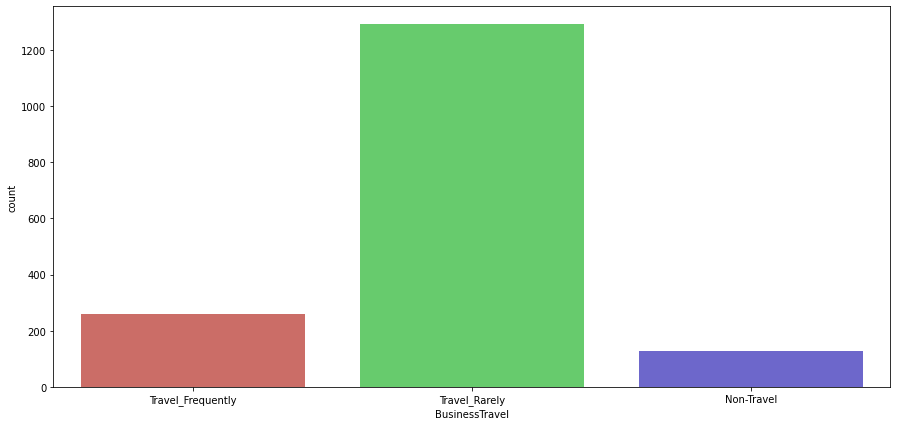



Countplot for: Department


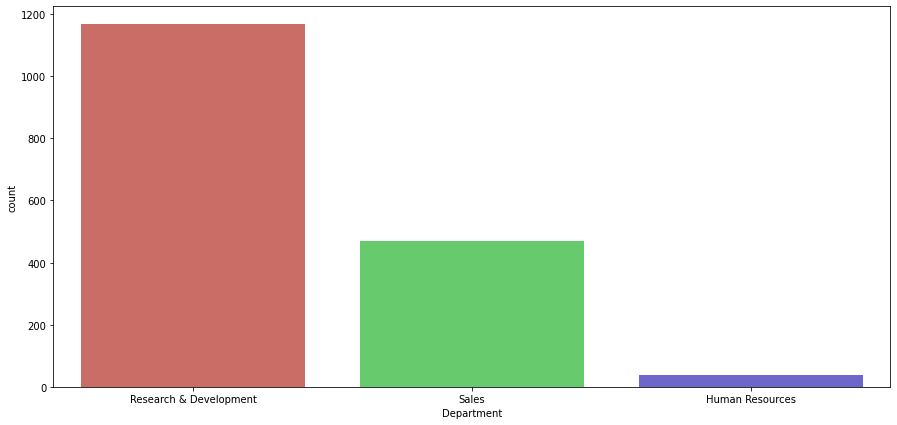



Countplot for: Education


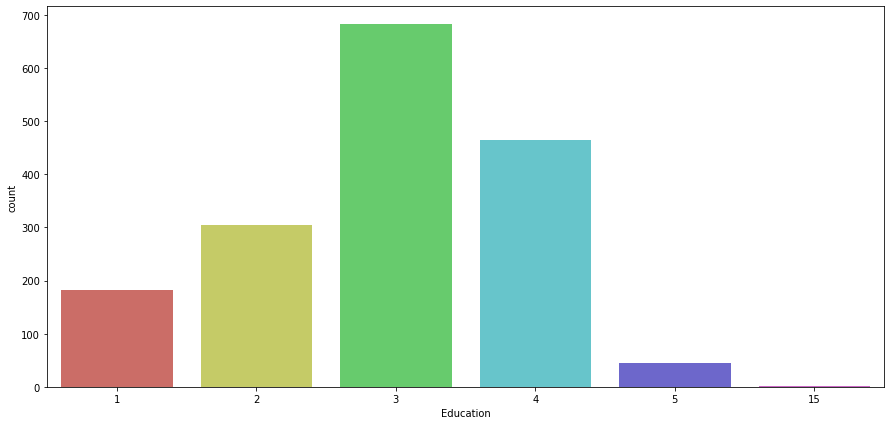



Countplot for: EducationField


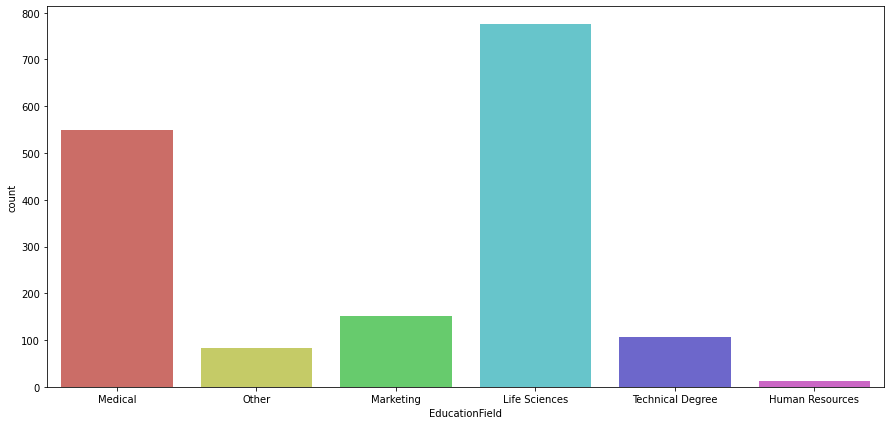



Countplot for: EnvironmentSatisfaction


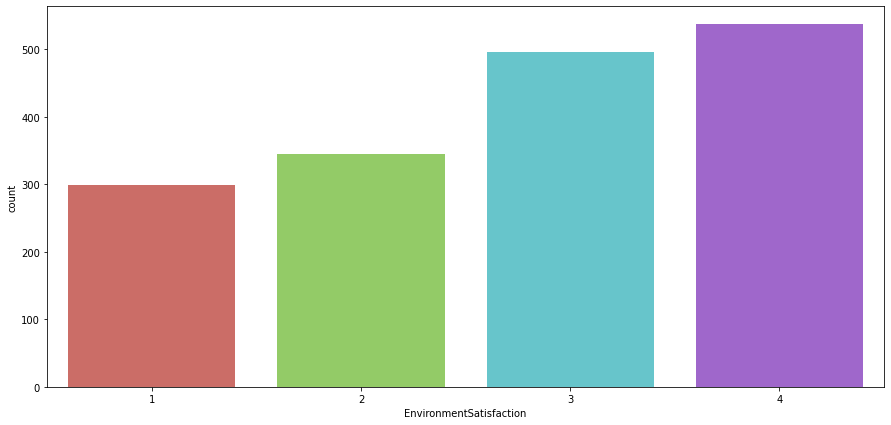



Countplot for: Gender


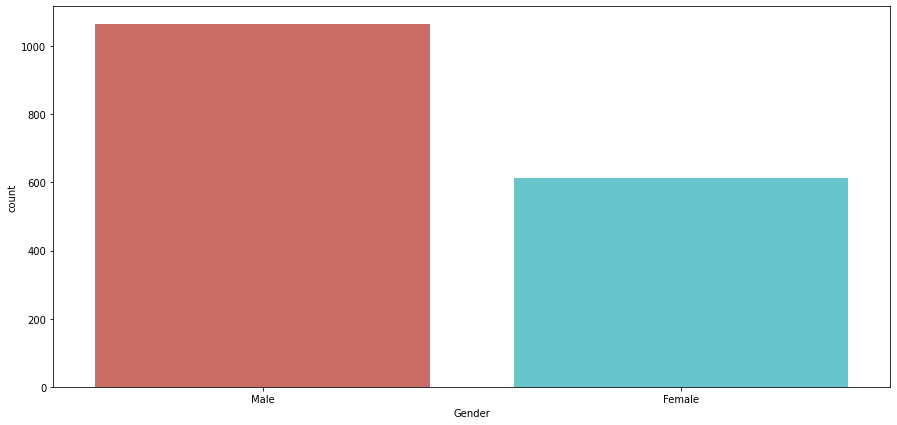



Countplot for: JobInvolvement


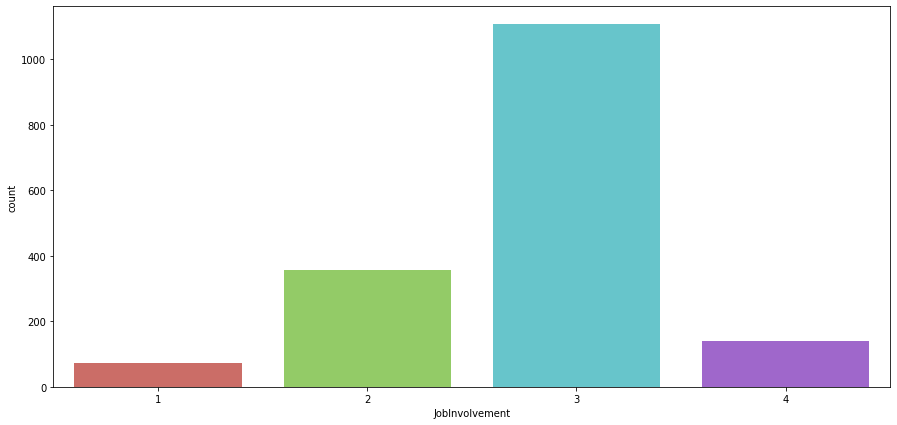



Countplot for: JobRole


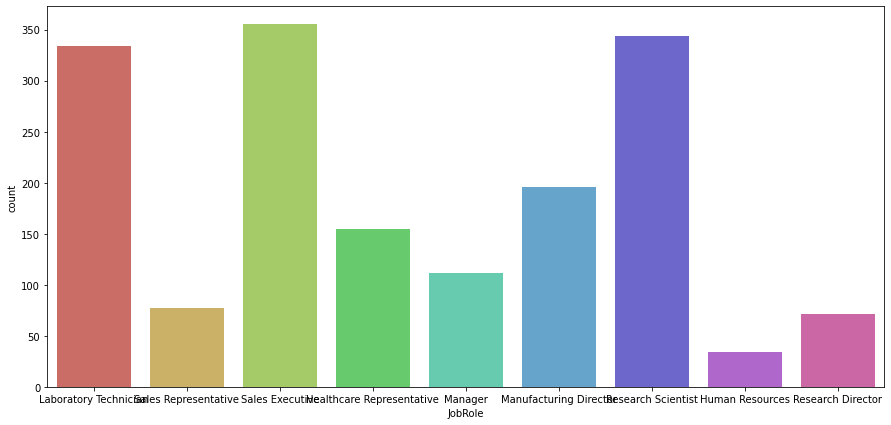



Countplot for: JobSatisfaction


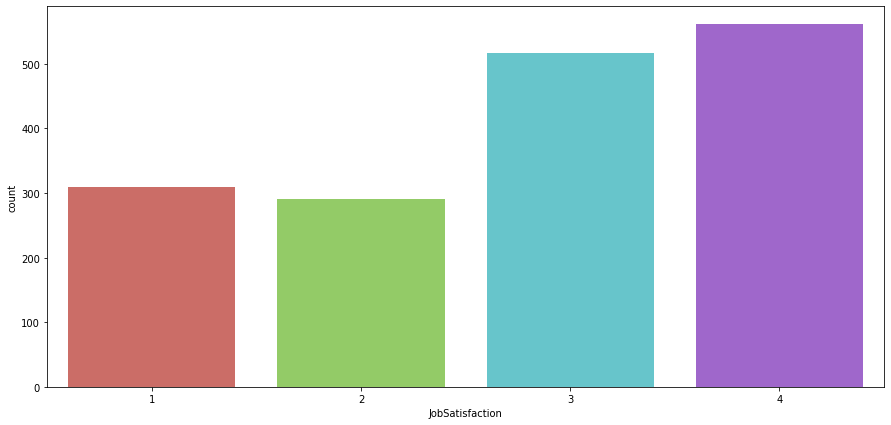



Countplot for: MaritalStatus


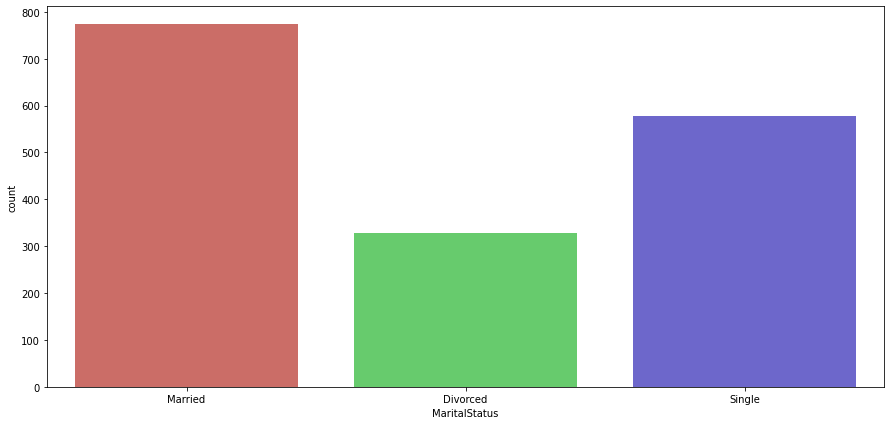



Countplot for: NumCompaniesWorked


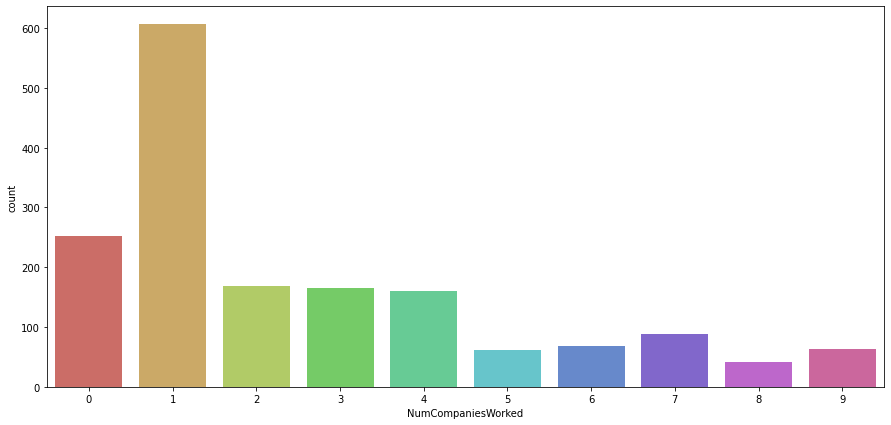



Countplot for: OverTime


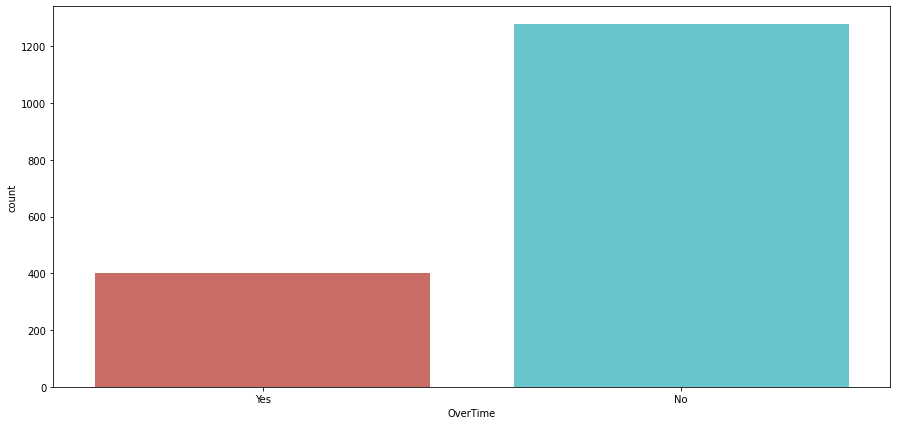



Countplot for: PerformanceRating


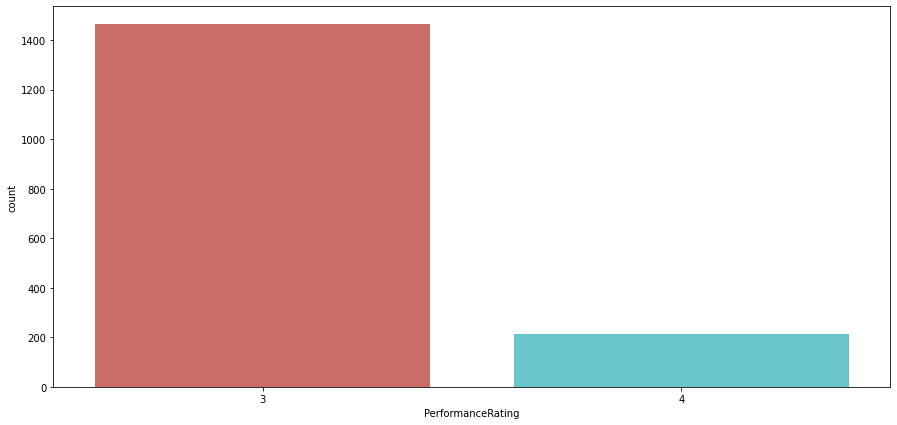



Countplot for: RelationshipSatisfaction


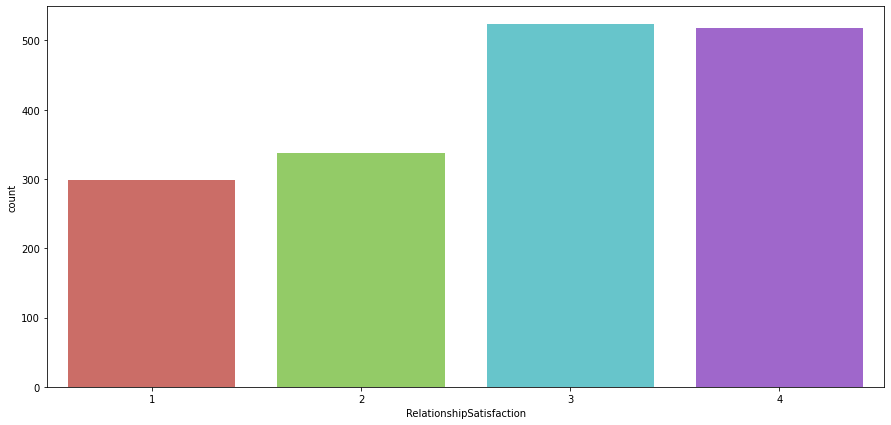



Countplot for: StockOptionLevel


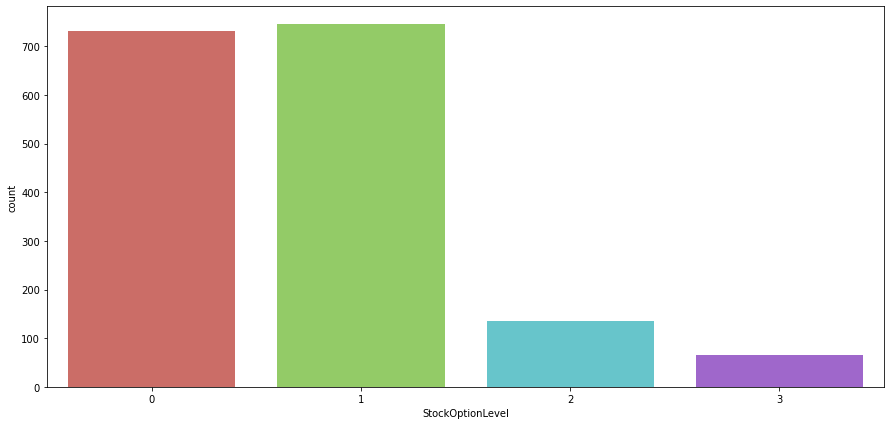



Countplot for: TrainingTimesLastYear


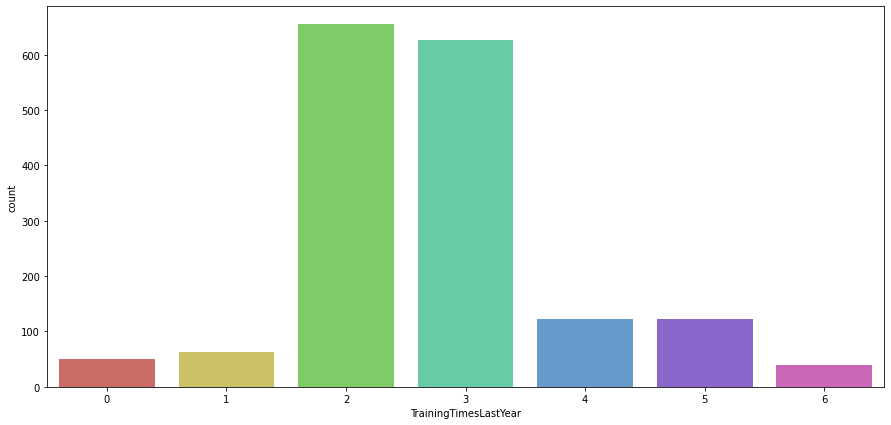



Countplot for: WorkLifeBalance


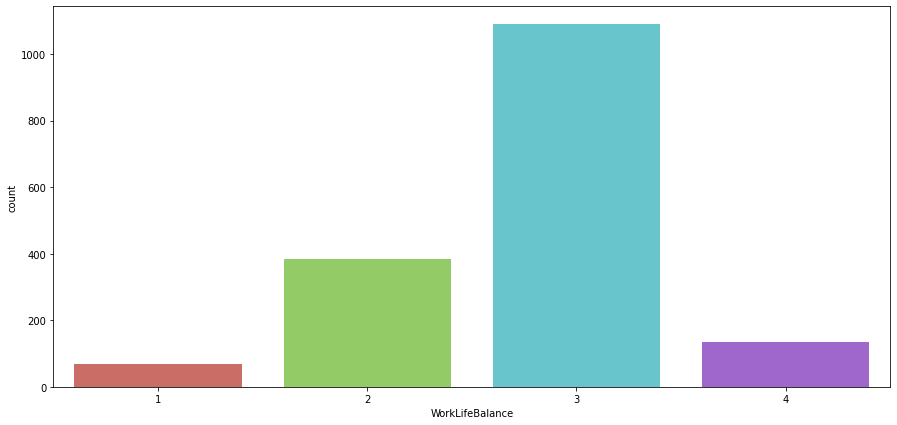



Countplot for: Attrition


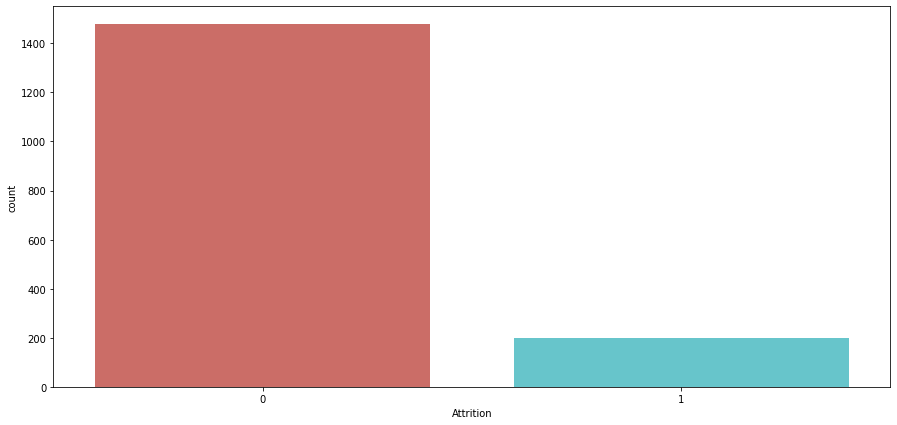

In [23]:
for i in df_new.columns:
    plt.figure(figsize=[15,7],)
    print('Countplot for:', i)
    sns.countplot(df_new[i], data = df_new, palette = 'hls')
    plt.xticks(rotation = 0)
    plt.show()
    print('\n')

Pieplot for: BusinessTravel


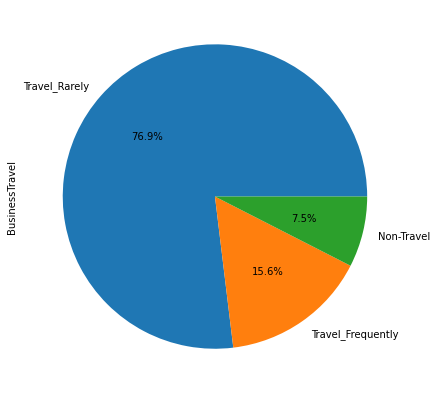



Pieplot for: Department


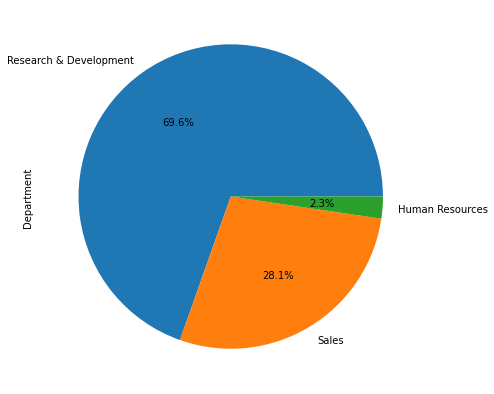



Pieplot for: Education


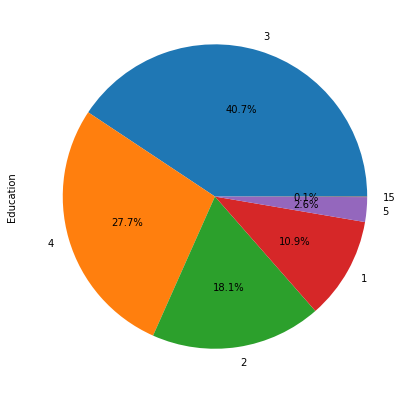



Pieplot for: EducationField


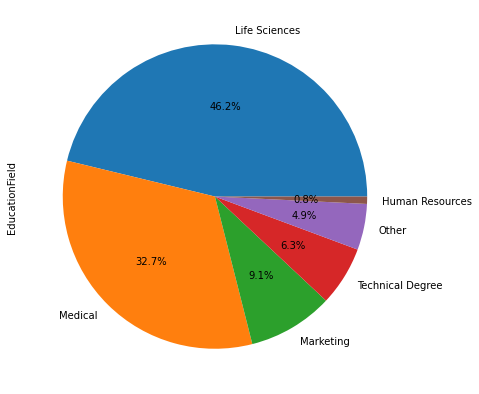



Pieplot for: EnvironmentSatisfaction


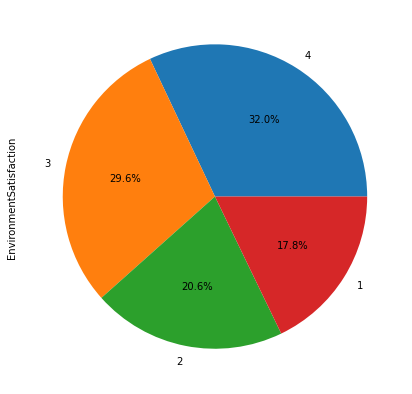



Pieplot for: Gender


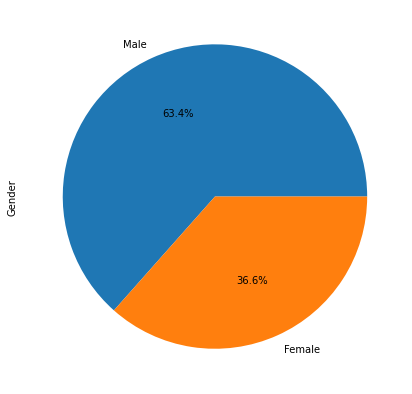



Pieplot for: JobInvolvement


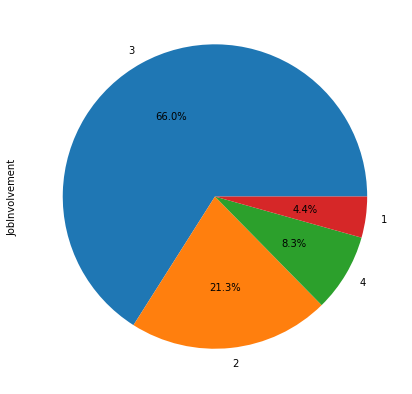



Pieplot for: JobRole


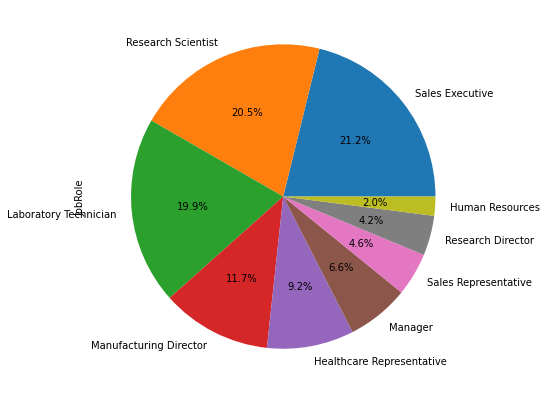



Pieplot for: JobSatisfaction


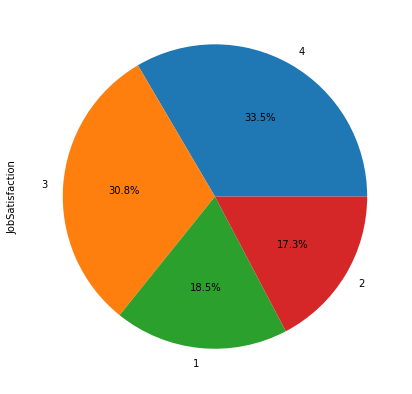



Pieplot for: MaritalStatus


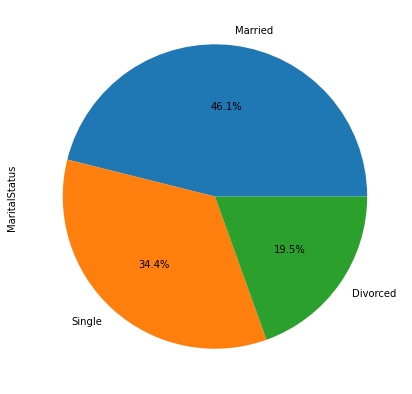



Pieplot for: NumCompaniesWorked


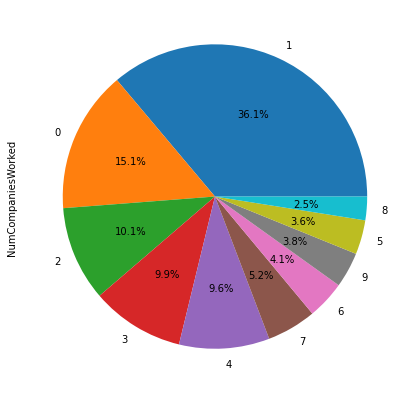



Pieplot for: OverTime


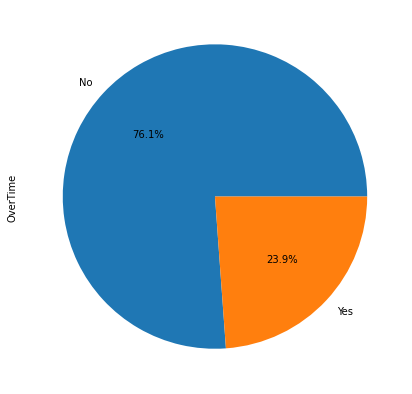



Pieplot for: PerformanceRating


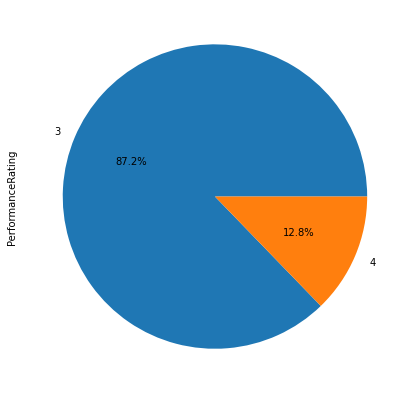



Pieplot for: RelationshipSatisfaction


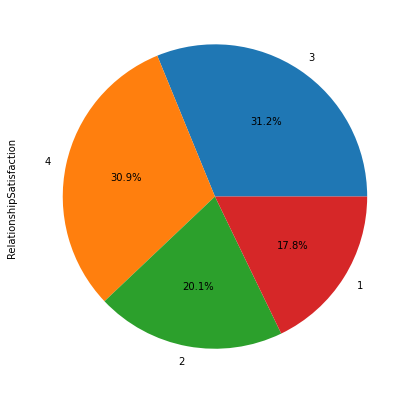



Pieplot for: StockOptionLevel


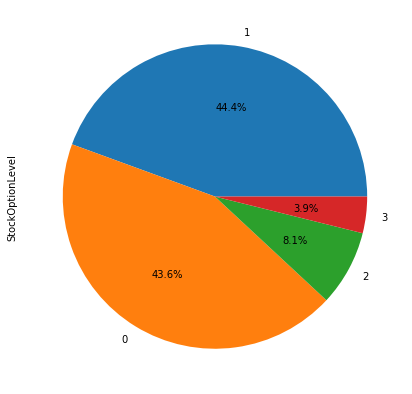



Pieplot for: TrainingTimesLastYear


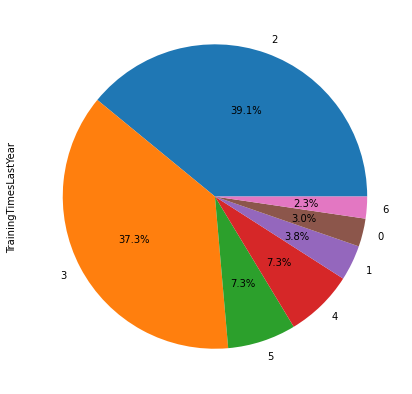



Pieplot for: WorkLifeBalance


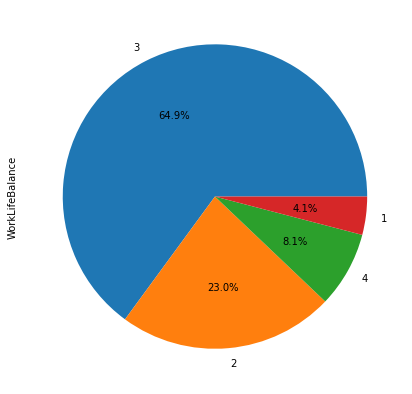



Pieplot for: Attrition


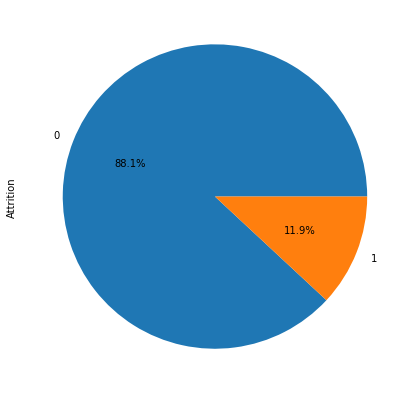

In [24]:
#trying pie charts to represent the data
for i in df_new.columns:
    plt.figure(figsize=[15,7],)
    print('Pieplot for:', i)
    df_new[i].value_counts().plot(kind='pie',autopct='%1.1f%%')
    plt.show()
    print('\n')

In [112]:
#Identify the int and objects column based on record's data type
int_cols = [col for col in df.columns if df[col].dtype == 'int64']
print('Integer columns:', int_cols)

print('\n')

obj_cols = [col for col in df.columns if df[col].dtype == 'object']
print('Object columns:', obj_cols)

Integer columns: ['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']


Object columns: []


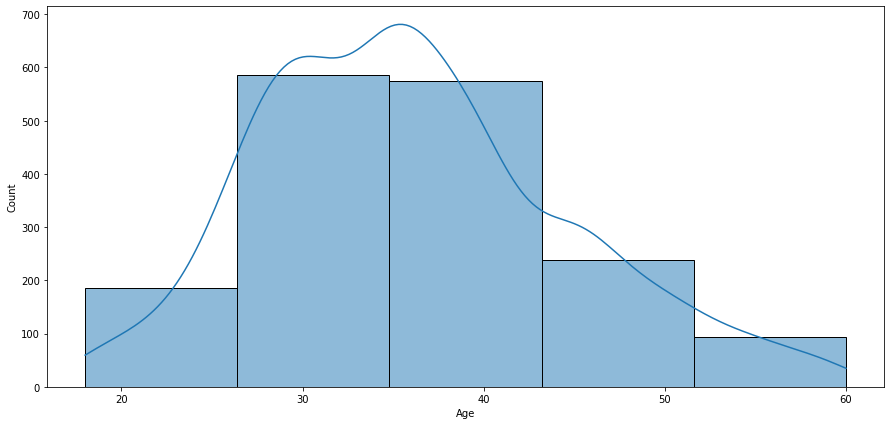

In [26]:
# Age analyzing
plt.figure(figsize=[15,7],)
sns.histplot(df['Age'], kde = 'True', bins = 5, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

## Present relation of defined points to Attrition Rating using box plots

In [27]:
import plotly.express as px

In [28]:
fig = px.box(df, x = 'Attrition', y = 'Age')
fig.show()

In [29]:
fig = px.box(df, x = 'Attrition', y = 'DailyRate')
fig.show()

In [30]:
fig = px.box(df, x = 'Attrition', y = 'DistanceFromHome')
fig.show()

In [31]:
fig = px.box(df, x = 'Attrition', y = 'Education')
fig.show()

In [32]:
fig = px.box(df, x = 'Attrition', y = 'EnvironmentSatisfaction')
fig.show()

In [33]:
fig = px.box(df, x = 'Attrition', y = 'JobLevel')
fig.show()

In [34]:
fig = px.box(df, x = 'Attrition', y = 'JobSatisfaction')
fig.show()

In [35]:
fig = px.box(df, x = 'Attrition', y = 'MonthlyIncome')
fig.show()

In [36]:
fig = px.box(df, x = 'Attrition', y = 'PercentSalaryHike')
fig.show()

In [37]:
fig = px.box(df, x = 'Attrition', y = 'RelationshipSatisfaction')
fig.show()

In [38]:
fig = px.box(df, x = 'Attrition', y = 'TotalWorkingYears')
fig.show()

In [39]:
fig = px.box(df, x = 'Attrition', y = 'WorkLifeBalance')
fig.show()

In [40]:
fig = px.box(df, x = 'Attrition', y = 'YearsAtCompany')
fig.show()

In [41]:
fig = px.box(df, x = 'Attrition', y = 'YearsInCurrentRole')
fig.show()

In [42]:
fig = px.box(df, x = 'Attrition', y = 'YearsSinceLastPromotion')
fig.show()

In [43]:
fig = px.box(df, x = 'Attrition', y = 'YearsWithCurrManager')
fig.show()

## Encoding with LabelEncoder to transform non-numerical labels

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['Gender'] = le.fit_transform(df['Gender'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['Over18'] = le.fit_transform(df['Over18'])
df['OverTime'] = le.fit_transform(df['OverTime'])

In [45]:
df.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,1,599,1,24,3,3,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,2,921,2,8,3,4,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,2,718,2,26,3,2,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,2,1488,1,2,3,3,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,2,1017,1,5,4,3,1,2,...,80,0,31,0,3,31,14,4,10,1


## Use corr() function to find the correlation among the columns in the Dataframe using the ‘Pearson’ method

In [46]:
corr = df.corr()

In [47]:
corr

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
id,1.000000,0.027563,-0.031831,0.003572,0.014652,0.007871,-0.015997,-0.007152,NaN,0.044271,...,NaN,-0.041337,-0.004288,0.010423,-0.006236,-0.020820,-0.020064,-0.002203,-0.005955,-0.006598
Age,0.027563,1.000000,0.017462,0.039686,-0.014663,-0.049025,0.223545,-0.018181,NaN,0.029557,...,NaN,0.064863,0.648047,0.014303,0.034138,0.306628,0.219880,0.204357,0.201601,-0.161044
BusinessTravel,-0.031831,0.017462,1.000000,-0.015708,-0.020004,0.005933,-0.018889,0.004240,NaN,-0.002002,...,NaN,-0.047337,0.008332,0.031099,-0.012355,-0.040091,-0.079881,-0.021144,-0.064886,0.000552
DailyRate,0.003572,0.039686,-0.015708,1.000000,0.025107,0.024168,-0.007035,-0.021046,NaN,0.006483,...,NaN,0.021273,0.058044,-0.023140,0.025152,0.066057,0.057011,0.037035,0.040969,-0.022380
Department,0.014652,-0.014663,-0.020004,0.025107,1.000000,0.029781,0.013881,-0.065715,NaN,-0.000465,...,NaN,-0.005868,0.021490,0.046363,-0.012399,0.022345,0.029925,0.053127,0.041859,0.031996
DistanceFromHome,0.007871,-0.049025,0.005933,0.024168,0.029781,1.000000,-0.011436,-0.023405,NaN,0.004959,...,NaN,0.039086,-0.033573,-0.000239,-0.017184,-0.023564,-0.006670,-0.004215,0.013749,0.024741
Education,-0.015997,0.223545,-0.018889,-0.007035,0.013881,-0.011436,1.000000,-0.019603,NaN,-0.011189,...,NaN,0.041722,0.153291,-0.011924,-0.009697,0.116723,0.094065,0.050483,0.109573,-0.084305
EducationField,-0.007152,-0.018181,0.004240,-0.021046,-0.065715,-0.023405,-0.019603,1.000000,NaN,0.028366,...,NaN,-0.016655,-0.008423,0.070101,0.008050,0.012349,0.025646,-0.001262,-0.000790,-0.006513
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,0.044271,0.029557,-0.002002,0.006483,-0.000465,0.004959,-0.011189,0.028366,NaN,1.000000,...,NaN,0.002093,0.022254,-0.028982,0.045387,0.009290,0.016942,0.028711,0.022839,-0.092426


## Visualize correlation using heatmap

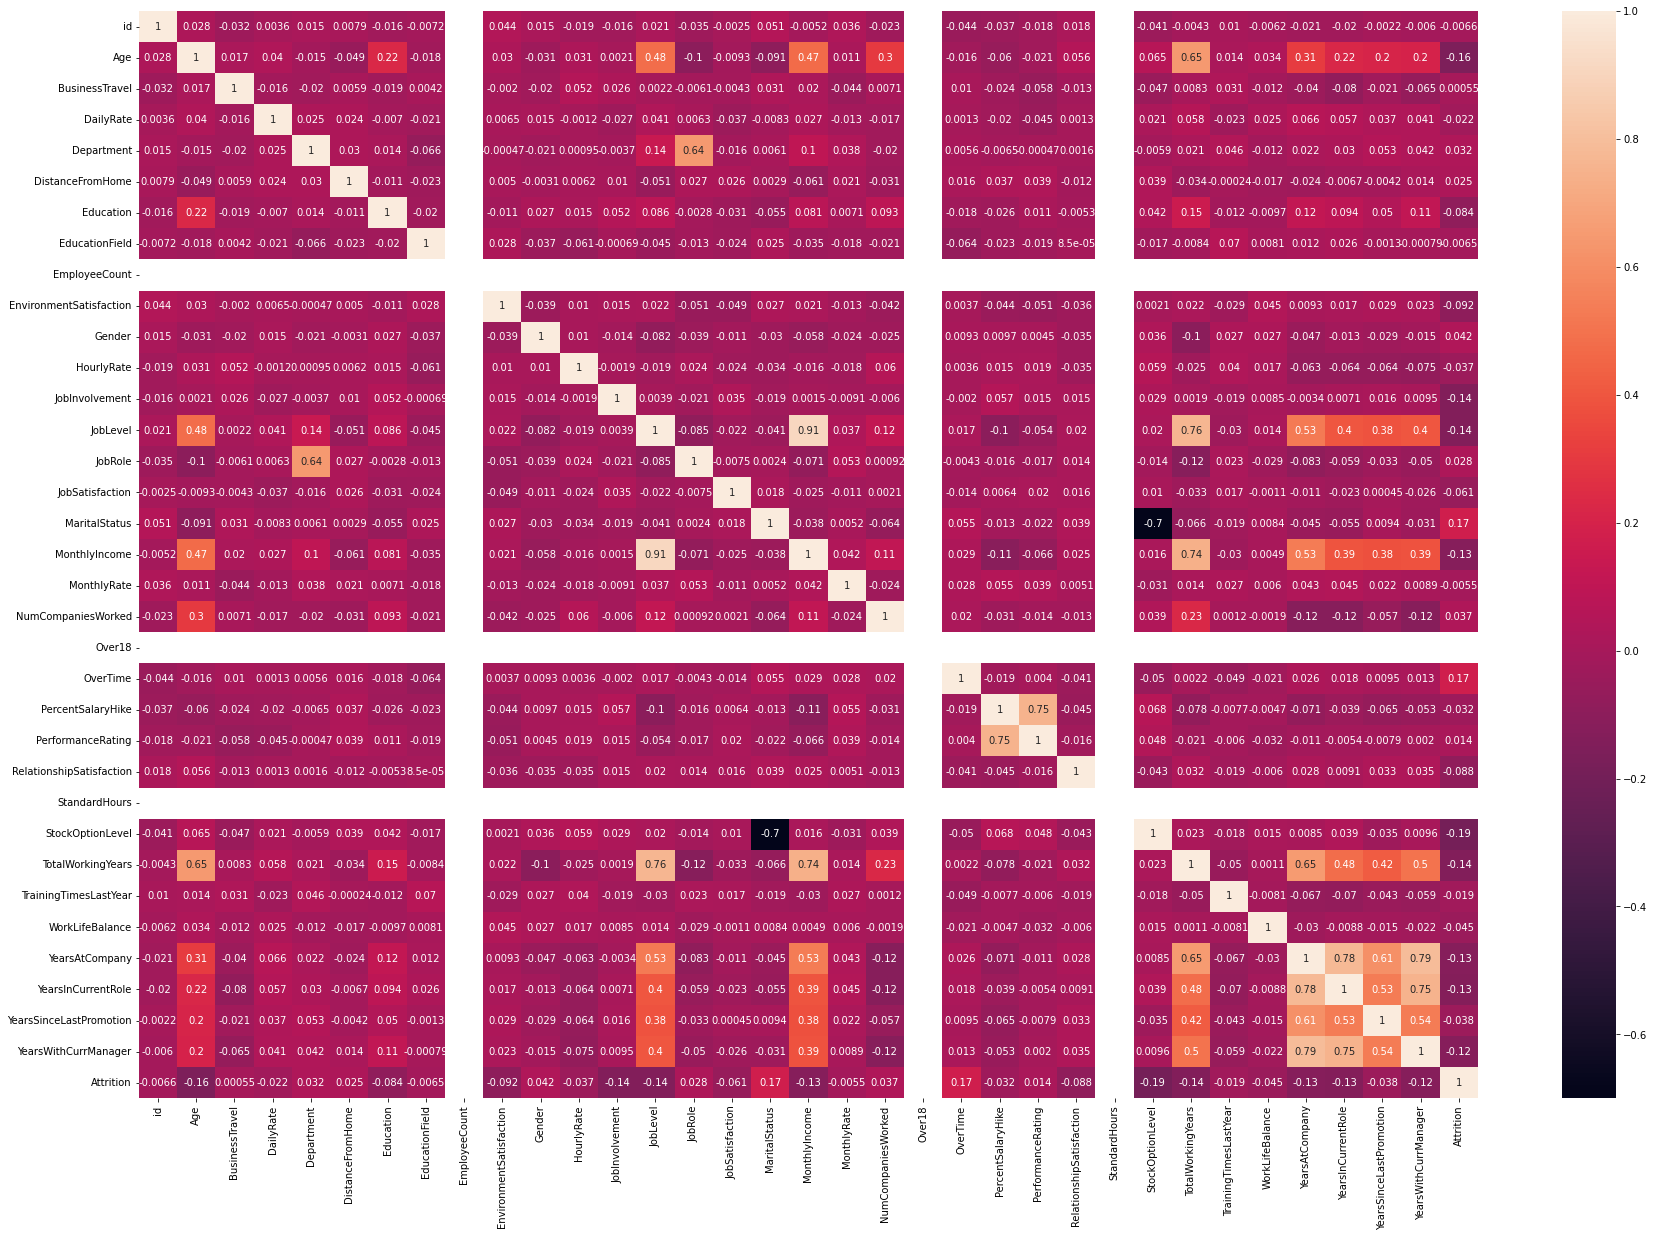

In [48]:
plt.figure(figsize=[30,20],)
sns.heatmap(corr, annot = True)
plt.show()